# Statistical testing in R

Here, we carry out simple statistical tests including t-test and ANOVA


## Installation of libraries and necessary software

Install the necessary libraries (only needed once) by executing (shift-enter) the following cell:


In [5]:
install.packages("MASS", repos='http://cran.us.r-project.org')
install.packages("perm", repos='http://cran.us.r-project.org')
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("qvalue")
install.packages("ggplot2",repos='http://cran.us.r-project.org')


The downloaded binary packages are in
	/var/folders/77/f9sm93v10k3_wzqf0868lmvw0000gn/T//RtmpwMWhXU/downloaded_packages

The downloaded binary packages are in
	/var/folders/77/f9sm93v10k3_wzqf0868lmvw0000gn/T//RtmpwMWhXU/downloaded_packages


'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'qvalue'”
Old packages: 'class', 'foreign', 'magrittr', 'Matrix', 'mgcv', 'nlme', 'nnet',
  'RColorBrewer', 'rpart', 'scales', 'spatial', 'survival', 'uuid', 'vctrs',
  'withr'




The downloaded binary packages are in
	/var/folders/77/f9sm93v10k3_wzqf0868lmvw0000gn/T//RtmpwMWhXU/downloaded_packages


## Loading data and libraries
This requires that the installation above have been finished without error

In [11]:
library("MASS")
library("perm")
library("qvalue")

### Exercise 1

The t-test is based on a null distribution that is described by the t-distribution. We will see how the sample size (here described by the degrees of freedom) changes the t-value threshold for obtaining a significantly changing feature.

Draw figures that show, for degrees of freedom between 1 and 100, the 5\% critical value of the t-statistic (that is the value above and below which 5\% of the density distribution are located, given by```qt(0.975,df=...)```). 

Plot the distribution on absolute and double-logarithmic scale. 


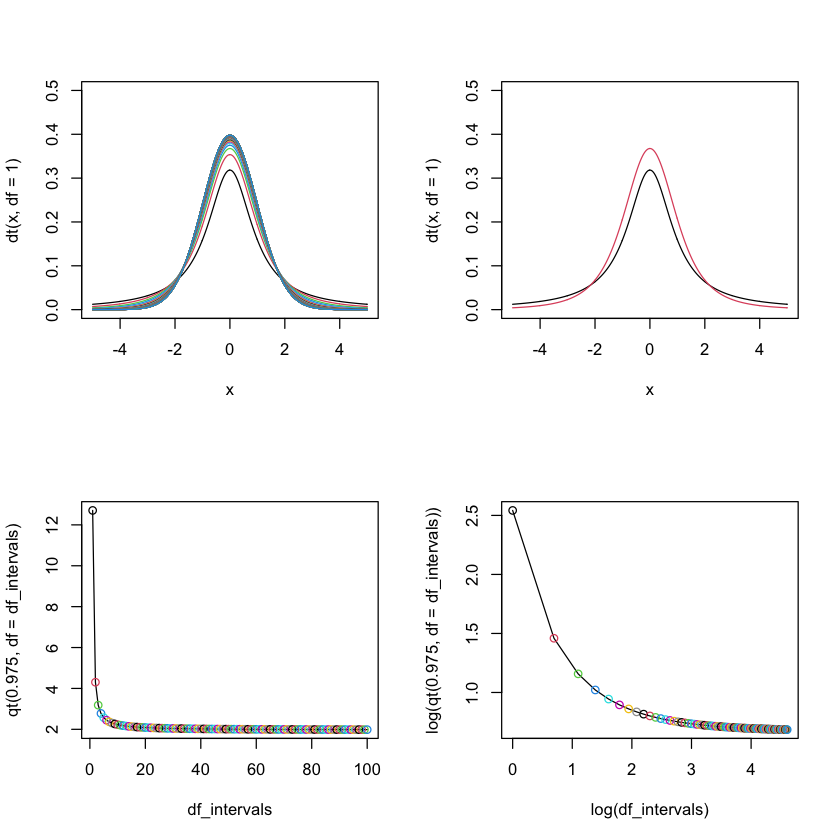

In [87]:
par(mfrow = c(2,2))
# add your code here:
x <- seq(-5,5,0.01)
plot(x,dt(x,df=1),"l",ylim=c(0,0.5))
for (i in 2:100) {
  lines(x,dt(x,df=i),col=i)
}
x <- seq(-5,5,0.01)
plot(x,dt(x,df=1),"l",ylim=c(0,0.5))
lines(x,dt(x,df=3),"l",ylim=c(0,0.5),col=2)

df_intervals<-seq(1,100,1)
plot(df_intervals,qt(0.975,df=df_intervals),"o",col=df_intervals)
plot(log(df_intervals),log(qt(0.975,df=df_intervals)),"o",col=df_intervals)


##### Question I:  <u>Which figure provides better visual information about the critical values?</u>

_The double-logarithmic scale provide better information, because the decrease is more clear.By the way,the t-distribution is polynomially decaying in the density function, while the standard normal distribution is exponentially decaying, much faster than the t-distribution._

##### Question II:  <u>What does the decrease mean when carrying out statistical tests?</u>

_The degrees of freedom are so closely related to sample size. As the DF decreases, the t-distribution has thicker tails. This property allows for the greater uncertainty associated with small sample sizes._


### Exercise 2
We will carry out ANOVA on artificial data consisting of the 3 categories A, B and C

Take a data frame with quantitative values for three groups

```stat.dat <- data.frame(x=rep(c("A","B","C"),each=10), 
                        y=c(rnorm(10), rnorm(10)+0.5, rnorm(10)-1))
```

a) Do an ANOVA to check whether B and C are significantly different from A

b) Do an ANOVA to check whether A, B and C are significantly different from 0

c) Do an ANOVA to check whether A and C are significantly different from B (you'll have to manually reorder the columns of ```stat.dat```)

d) Calculate a t-test between C and A and compare the result to a)

e) Redo ANOVA on the data set containing only A and C and compare again


In [88]:
num <- 10
stat.dat <- data.frame(x=rep(c("A","B","C"),each=num), 
                       y=c(rnorm(num), rnorm(num)+0.5, rnorm(num)-1))
# a)
summary(lm(y~x, data=stat.dat))

# b)
seq1<-c(0,0,0,0,0,0,0,0,0,0)
stat.dat1 <- data.frame(x=rep(c("0","A","B","C"),each=num), 
                       y=c(seq1,rnorm(num), rnorm(num)+0.5, rnorm(num)-1))
summary(lm(y~x, data=stat.dat1))

# c)
stat.dat$x <- factor(stat.dat$x,levels=c("B","A","C"))
summary(lm(y~x, data=stat.dat))

# d)
t.test(rnorm(num),rnorm(num)-1)

# e)
num <- 10
stat.dat2 <- data.frame(x=rep(c("A","C"),each=num), 
                       y=c(rnorm(num),rnorm(num)-1))
summary(lm(y~x, data=stat.dat2))




Call:
lm(formula = y ~ x, data = stat.dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7672 -0.3344 -0.0692  0.3570  1.8057 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   0.2140     0.2877   0.744  0.46343   
xB            0.4177     0.4069   1.027  0.31368   
xC           -1.3397     0.4069  -3.293  0.00277 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9098 on 27 degrees of freedom
Multiple R-squared:   0.43,	Adjusted R-squared:  0.3878 
F-statistic: 10.18 on 2 and 27 DF,  p-value: 0.0005064



Call:
lm(formula = y ~ x, data = stat.dat1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5896 -0.2230  0.0000  0.3712  1.9047 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -4.772e-16  2.673e-01   0.000  1.00000   
xA           5.226e-01  3.780e-01   1.382  0.17535   
xB           4.732e-01  3.780e-01   1.252  0.21869   
xC          -1.190e+00  3.780e-01  -3.149  0.00329 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8453 on 36 degrees of freedom
Multiple R-squared:  0.4254,	Adjusted R-squared:  0.3776 
F-statistic: 8.886 on 3 and 36 DF,  p-value: 0.0001535



Call:
lm(formula = y ~ x, data = stat.dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7672 -0.3344 -0.0692  0.3570  1.8057 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.6317     0.2877   2.196 0.036882 *  
xA           -0.4177     0.4069  -1.027 0.313676    
xC           -1.7574     0.4069  -4.319 0.000189 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9098 on 27 degrees of freedom
Multiple R-squared:   0.43,	Adjusted R-squared:  0.3878 
F-statistic: 10.18 on 2 and 27 DF,  p-value: 0.0005064



	Welch Two Sample t-test

data:  rnorm(num) and rnorm(num) - 1
t = 1.1689, df = 15.738, p-value = 0.2598
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3324633  1.1472869
sample estimates:
  mean of x   mean of y 
-0.05488409 -0.46229587 



Call:
lm(formula = y ~ x, data = stat.dat2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3193 -0.7342 -0.3850  0.6558  2.1442 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  -0.1166     0.3281  -0.355    0.726  
xC           -0.9798     0.4640  -2.112    0.049 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.038 on 18 degrees of freedom
Multiple R-squared:  0.1986,	Adjusted R-squared:  0.154 
F-statistic: 4.459 on 1 and 18 DF,  p-value: 0.04895


##### Question I:  <u>Why do you expect the sample groups A, B and C to be different?</u>

_They have different means,they are differnet sets._

##### Question II:  <u>What do the coefficients mean in a) and b)?</u>

_Estimate: This section tells us about the least-squares.Estimates stands for the fitted line. A=y-Intercept+slope*B+slope*C.  
The standard error is the average amount that the estimate varies from the actual value.  
"t value" is a measure of how many standard deviations there are between the estimate and zero.  
Pr(>|t|):These are the p-value for the estimated parameters._


##### Question III:  <u>Could one use t-tests to show the cases in b)?</u>

_NO.The t.test only suit for two sample groups' compare._

##### Question IV:  <u>What does removing a sample group mean for the ANOVA test?</u>

_In the ANOVA test, a group is the set of samples within the independent variable.  
There are variations among the individual groups as well as within the group. This gives rise to the two terms: Within-group variability and Between-group variability.  
When there is a big variation in the sample distributions of the individual groups, it is called between-group variability.  
On the other hand, when there are variations in the sample distribution within an individual group, it is called Within-group variability._


### Exercise 3
a) Redo Exercise 2 using a sample size of 5 instead of 10.

b) Change the normal distribution to an exponential one and check whether you would accept any of the results as significantly different.



In [37]:
#a)
num <- 5
stat.dat <- data.frame(x=rep(c("A","B","C"),each=num), 
                       y=c(rnorm(num), rnorm(num)+0.5, rnorm(num)-1))
# a1)
summary(lm(y~x, data=stat.dat))
# a2)
seq1<-c(0,0,0,0,0)
stat.dat1 <- data.frame(x=rep(c("0","A","B","C"),each=num), 
                       y=c(seq1,rnorm(num), rnorm(num)+0.5, rnorm(num)-1))
summary(lm(y~x, data=stat.dat1))
# a3)
stat.dat$x <- factor(stat.dat$x,levels=c("B","A","C"))
summary(lm(y~x, data=stat.dat))
# a4)
t.test(rnorm(num),rnorm(num)-1)
# a5)
num <- 5
stat.dat <- data.frame(x=rep(c("A","C"),each=num), 
                       y=c(rnorm(num),rnorm(num)-1))
summary(lm(y~x, data=stat.dat))

#b) 
num <- 10
stat.dat <- data.frame(x=rep(c("A","B","C"),each=num), 
                       y=c(rexp(num), rexp(num)+0.5, rexp(num)-1))
# b1)
summary(lm(y~x, data=stat.dat))
# b2)
seq1<-c(0,0,0,0,0,0,0,0,0,0)
stat.dat1 <- data.frame(x=rep(c("0","A","B","C"),each=num), 
                       y=c(seq1,rexp(num), rexp(num)+0.5, rexp(num)-1))
summary(lm(y~x, data=stat.dat1))
# b3)
stat.dat$x <- factor(stat.dat$x,levels=c("B","A","C"))
summary(lm(y~x, data=stat.dat))
# b4)
t.test(rexp(num),rexp(num)-1)
# b5)
num <- 10
stat.dat <- data.frame(x=rep(c("A","C"),each=num), 
                       y=c(rexp(num),rexp(num)-1))
summary(lm(y~x, data=stat.dat))




Call:
lm(formula = y ~ x, data = stat.dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1214 -0.3659 -0.1841  0.3094  1.3421 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   0.7095     0.3280   2.163  0.05140 . 
xB           -0.1113     0.4638  -0.240  0.81433   
xC           -1.9897     0.4638  -4.290  0.00105 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7333 on 12 degrees of freedom
Multiple R-squared:  0.6595,	Adjusted R-squared:  0.6027 
F-statistic: 11.62 on 2 and 12 DF,  p-value: 0.001559



Call:
lm(formula = y ~ x, data = stat.dat1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5174 -0.3717  0.0000  0.2240  1.4922 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -2.164e-16  2.778e-01   0.000  1.00000   
xA           4.630e-01  3.929e-01   1.178  0.25588   
xB           7.686e-01  3.929e-01   1.956  0.06814 . 
xC          -1.185e+00  3.929e-01  -3.017  0.00818 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6212 on 16 degrees of freedom
Multiple R-squared:  0.6415,	Adjusted R-squared:  0.5743 
F-statistic: 9.543 on 3 and 16 DF,  p-value: 0.0007516



Call:
lm(formula = y ~ x, data = stat.dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1214 -0.3659 -0.1841  0.3094  1.3421 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   0.5982     0.3280   1.824  0.09316 . 
xA            0.1113     0.4638   0.240  0.81433   
xC           -1.8783     0.4638  -4.050  0.00161 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7333 on 12 degrees of freedom
Multiple R-squared:  0.6595,	Adjusted R-squared:  0.6027 
F-statistic: 11.62 on 2 and 12 DF,  p-value: 0.001559



	Welch Two Sample t-test

data:  rnorm(num) and rnorm(num) - 1
t = 0.66144, df = 7.9121, p-value = 0.5271
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.370706  2.470320
sample estimates:
 mean of x  mean of y 
-0.2962897 -0.8460967 



Call:
lm(formula = y ~ x, data = stat.dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3819 -1.1147  0.2748  1.0271  1.7526 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)   0.4064     0.6605   0.615    0.555
xC           -0.7025     0.9341  -0.752    0.474

Residual standard error: 1.477 on 8 degrees of freedom
Multiple R-squared:  0.06604,	Adjusted R-squared:  -0.0507 
F-statistic: 0.5657 on 1 and 8 DF,  p-value: 0.4735



Call:
lm(formula = y ~ x, data = stat.dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2920 -0.7850 -0.1132  0.8514  1.8918 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.2026     0.2998   4.011  0.00043 ***
xB            0.2179     0.4240   0.514  0.61149    
xC           -0.7379     0.4240  -1.741  0.09315 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.948 on 27 degrees of freedom
Multiple R-squared:  0.1714,	Adjusted R-squared:   0.11 
F-statistic: 2.792 on 2 and 27 DF,  p-value: 0.07904



Call:
lm(formula = y ~ x, data = stat.dat1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3926 -0.5970  0.0000  0.0893  3.6391 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.088e-15  3.111e-01   0.000   1.0000    
xA           8.822e-01  4.399e-01   2.005   0.0525 .  
xB           2.043e+00  4.399e-01   4.645 4.43e-05 ***
xC           2.394e-01  4.399e-01   0.544   0.5897    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9837 on 36 degrees of freedom
Multiple R-squared:  0.4185,	Adjusted R-squared:   0.37 
F-statistic: 8.635 on 3 and 36 DF,  p-value: 0.0001894



Call:
lm(formula = y ~ x, data = stat.dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2920 -0.7850 -0.1132  0.8514  1.8918 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.4205     0.2998   4.738 6.16e-05 ***
xA           -0.2179     0.4240  -0.514   0.6115    
xC           -0.9558     0.4240  -2.254   0.0325 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.948 on 27 degrees of freedom
Multiple R-squared:  0.1714,	Adjusted R-squared:   0.11 
F-statistic: 2.792 on 2 and 27 DF,  p-value: 0.07904



	Welch Two Sample t-test

data:  rexp(num) and rexp(num) - 1
t = 2.3816, df = 17.385, p-value = 0.02891
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.09852254 1.60603965
sample estimates:
mean of x mean of y 
1.0817114 0.2294303 



Call:
lm(formula = y ~ x, data = stat.dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.20570 -0.72217 -0.00944  0.54711  2.75782 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.2813     0.3092   4.144 0.000609 ***
xC           -1.4365     0.4373  -3.285 0.004114 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9778 on 18 degrees of freedom
Multiple R-squared:  0.3748,	Adjusted R-squared:  0.3401 
F-statistic: 10.79 on 1 and 18 DF,  p-value: 0.004114


##### Question I:  <u>What does improve when using a sample size of 10? How does this relate to Exercise 1?</u>

_df increased from 5 to 10_

##### Question II:  <u>Why shouldn't be apply ANOVA to exponentially distributed data?</u>

_The key conditions of ANOVA:  
1.Each group follows normal distribution;  
2.Each group conforms to homogeneity of variance;  
3.The independence.  
But the exponential distribution has the property of no memory and does not satisfy the condition of normal distribution._


### Exercise 4
We will now compare the results from three different statistical tests applied to the same data.

a) Try to understand the function ```TestCompare()``` that calculates the p-values of three statistical tests: two-sample t-test, the Wilcoxon rank test and a permutation test. 

b) Take the data ```PlantGrowth``` and reduce it to conditions ```ctrl``` and ```trt2```. 
Use ```TestCompare``` on the data and compare the p-values from the different tests.

c) Apply the function on normally distributed artificial data having the same number of values, the same mean and the same standard deviation as ```ctrl``` and ```trt2```. Repeat this 1000 times.

d) Check the distribution of the 1000 p-values per test and compare the p-values to the one obtained for the ```PlantGrowth``` data.



,weight,group
,<dbl>,<fct>
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl
6,4.61,ctrl


[1] 0.04789926 0.06301284 0.05015044

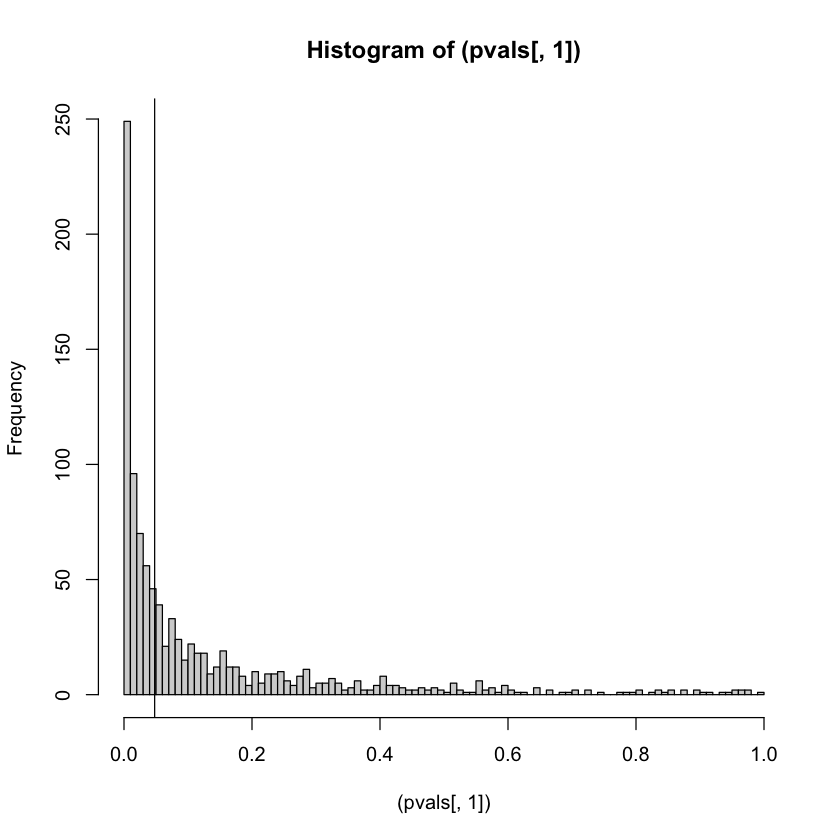

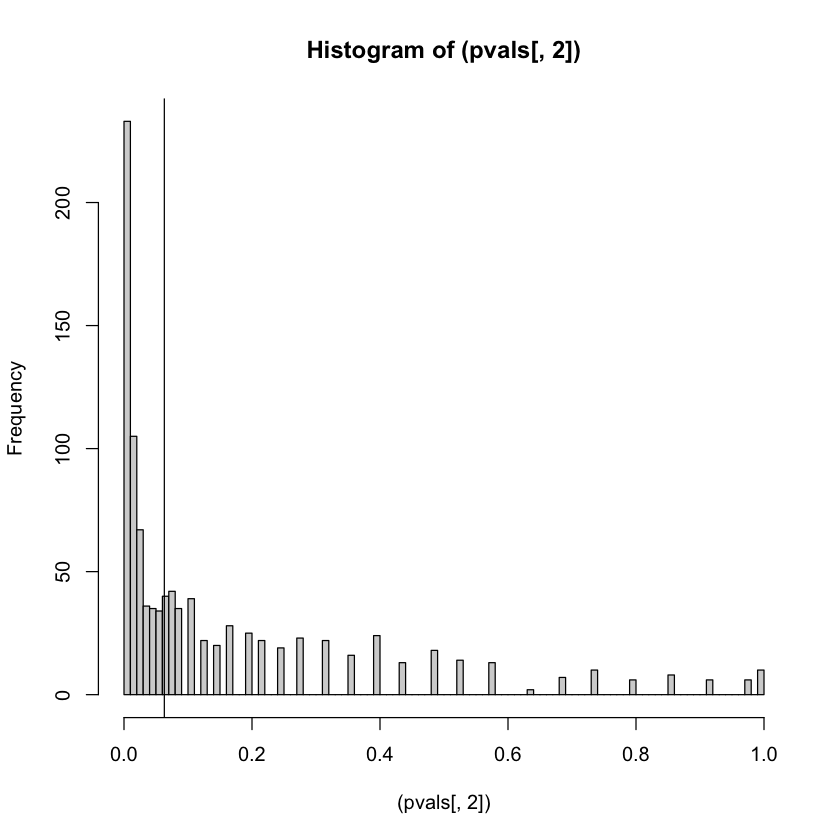

[1] "t-test: 492"

[1] "Wilcoxon rank test: 450"

[1] "permutation test: 489"

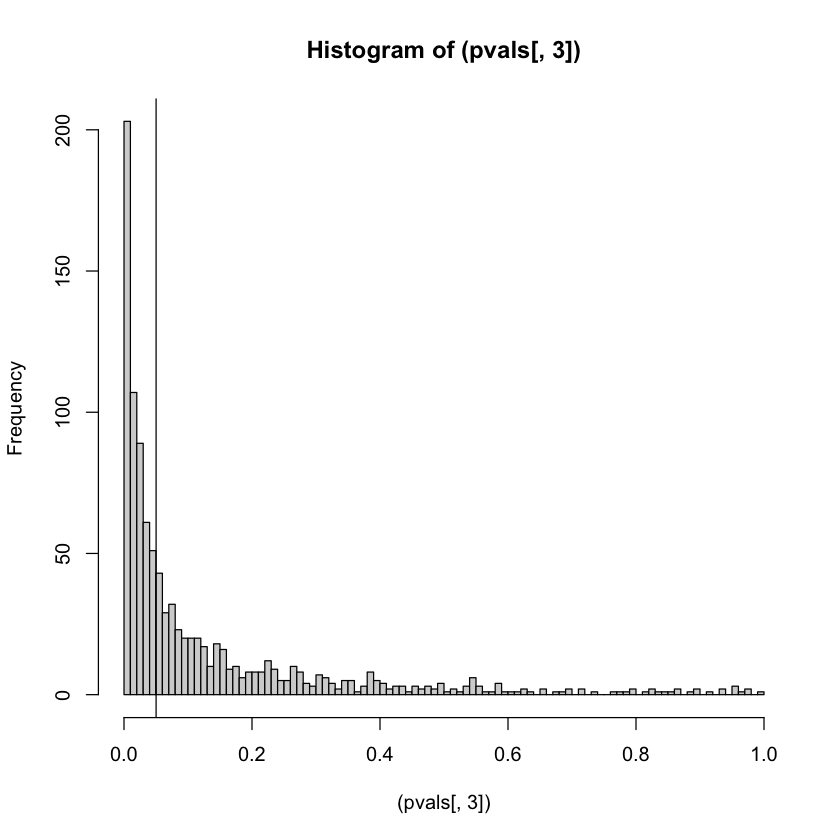

In [92]:
data("PlantGrowth")
library(perm)

# a)
mydat <- PlantGrowth[PlantGrowth$group=="ctrl" | PlantGrowth$group=="trt2",]
head(mydat)
TestCompare <- function(sample1, sample2){
  pval1 <- t.test(sample1,sample2)$p.value
  pval2 <- wilcox.test(sample1,sample2)$p.value
  pval3 <- permTS(sample1,sample2)$p.value
  c(pval1,pval2,pval3)
}

# b)
mypvals <- TestCompare(mydat[mydat$group=="ctrl",1], mydat[mydat$group=="trt2",1])
mypvals 

# c)
m1 <- mean(mydat[mydat$group=="ctrl",1])
m2 <- mean(mydat[mydat$group=="trt2",1])
s1 <- sd(mydat[mydat$group=="ctrl",1])
s2 <- sd(mydat[mydat$group=="trt2",1])
n1 <- length(mydat[mydat$group=="ctrl",1])
n2 <- length(mydat[mydat$group=="trt2",1])

pvals <- matrix(NA,ncol=3,nrow=1000)
for (i in 1:1000) {
  # add the results from the corresponding tests here
  pvals[i,] <- TestCompare(rnorm(n1,m1,s1), rnorm(n2,m2,s2))
  
}
ttt <- TestCompare(mydat[mydat$group=="ctrl",1], mydat[mydat$group=="trt2",1])

hist((pvals[,1]),100)
abline(v=ttt[1])
hist((pvals[,2]),100)
abline(v=ttt[2])
hist((pvals[,3]),100)
abline(v=ttt[3])

# d) 
paste("t-test:",sum(pvals[,1]> ttt[1]))
paste("Wilcoxon rank test:",sum(pvals[,2]> ttt[2]))
paste("permutation test:",sum(pvals[,3]> ttt[3]))

##### Question I:  <u>Any idea why the t-test gives the lowest p-value?</u>

_T test needs the most detailed information, so it's very sensitive.  
The Wilcoxon rank test is anon-parametric test,	which is not concerned with the value of the data, but only concern the rank of the data. Sometimes may get a false positive, so we get a p-value bigger than  t-test.  
The permutation test is supposed to get a smaller p-value than the t-test, but here we qet a bigger P than the t-test._

##### Question II:  <u>Which test gives the lowest number of p-values from the artificial data which are larger than the p-value calculated for the PlantGrowth data?</u>

_the lowest number : t-test_

### Exercise 5
Redo the first part of Exercise 4 changing to paired tests. 



[1] 0.1101439 0.1308594

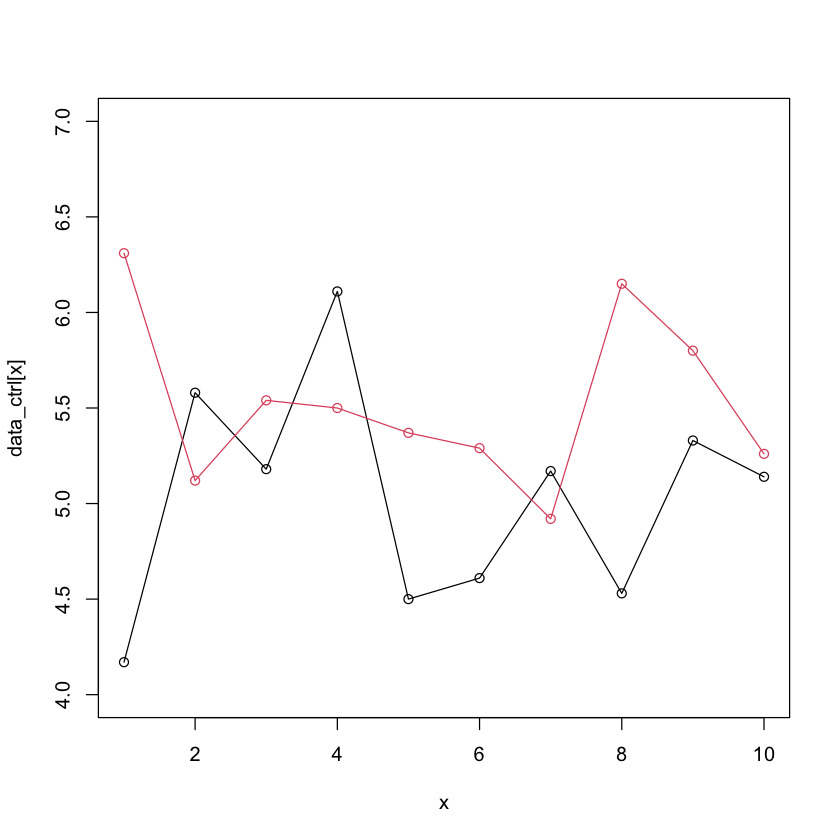

In [95]:
TestCompare_paired <- function(sample1, sample2){
  pval1_paired <- t.test(sample1,sample2,paired=T)$p.value
  pval2_paired <- wilcox.test(sample1,sample2,paired=T)$p.value
  c(pval1_paired,pval2_paired)
}

data_ctrl <- PlantGrowth[PlantGrowth$group=="ctrl",1]
data_trt2 <- PlantGrowth[PlantGrowth$group=="trt2",1]
tt_paired <- TestCompare_paired(data_ctrl,data_trt2)
tt_paired

x<-seq(1,10,1)
plot(x,data_ctrl[x],"o",col=1,ylim=c(4,7))
lines(x,data_trt2[x],"o",col=2)


##### Question I:  <u>When should you use a paired test? Give an example.</u>

_The paired t -test is a method used to test whether the mean difference between pairs of measurements is zero or not. For example, you might have before-and-after measurements for a group of people._

##### Question II:  <u>Which difference in the results do you observe?</u>

_The p-value is lagger, but it should be smaller._



### Exercise 6
_Correction for multiple testing:_
This exercise will give you more insight into the different methods for correction of multiple testing and how they correct the p-values.

a) Write a function to calculate the p-value (t-test) between normally distributed (s.d. 1) artificial sets mutually shifted by $S$ (set default to 0.5). 

b) Write a for loop to get 1000 p-values from the same comparison and plot them on a histogram. Count the number of p-values below 0.05.

c) Correct for multiple testing using Bonferroni, Benjamin-Hochberg (```p.adjust```)and ```qvalue()``` (```qvalues``` package). Count the number of corrected p-values below 0.05.

d) Repeat the same for a shift of $S=1$ and $S=0$. How many corrected p-values below 0.05 would one optimally get for $S=0$?



[1] 0.004713107

[1] 183

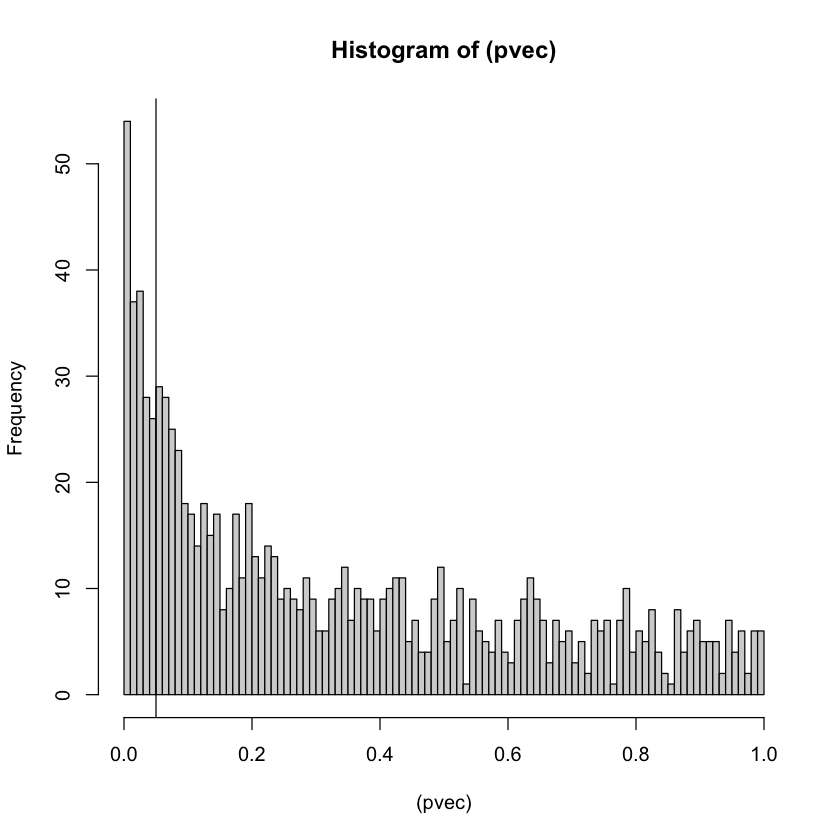

[1] 187

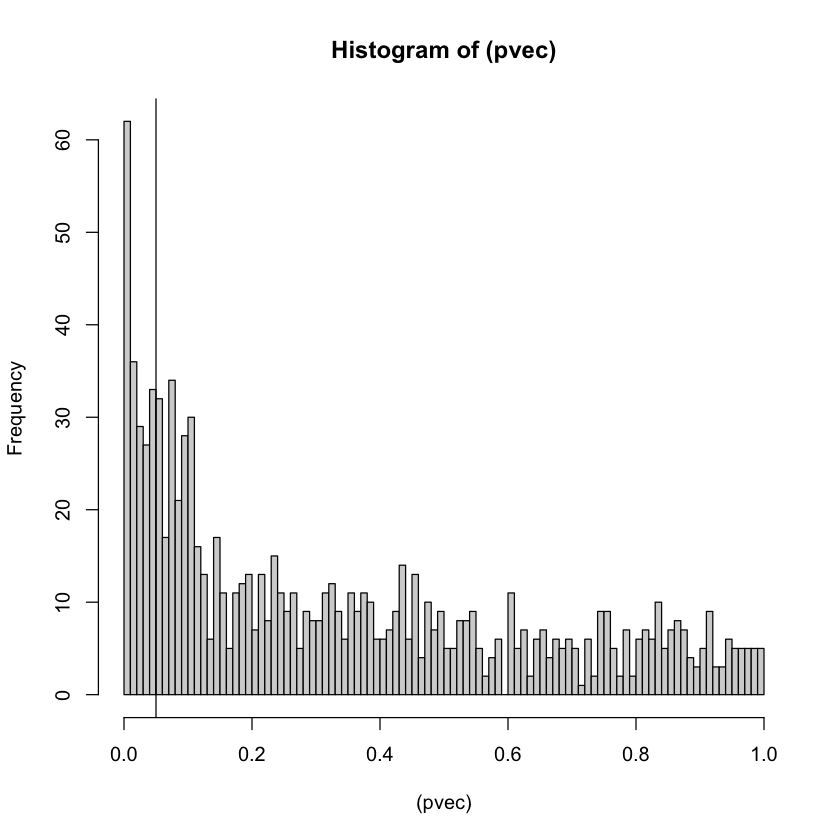

[1] 174

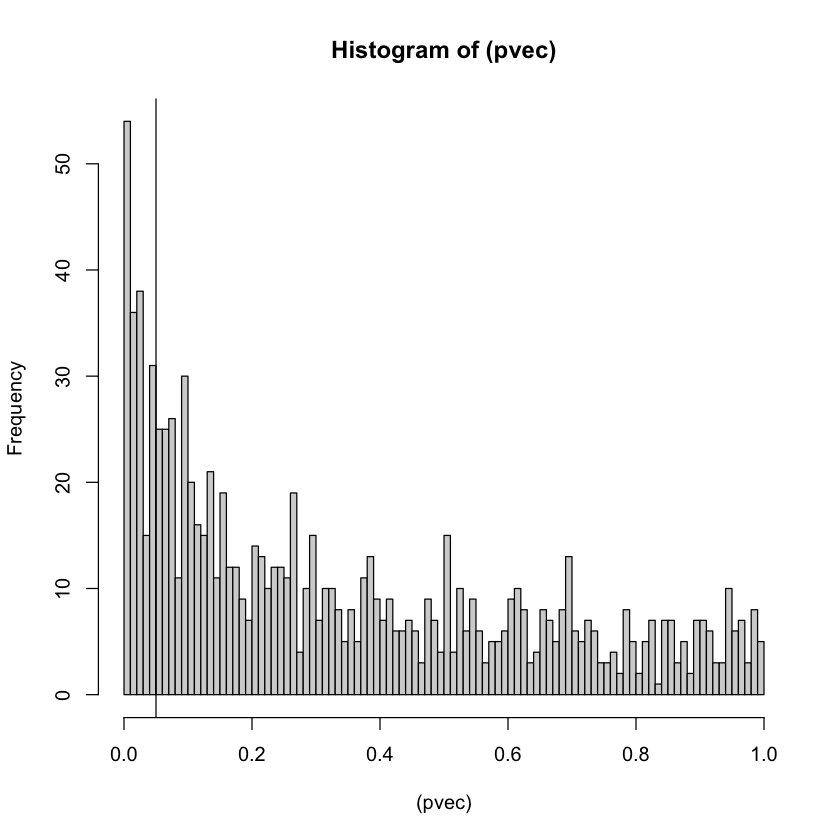

[1] "below 0.05: 20"

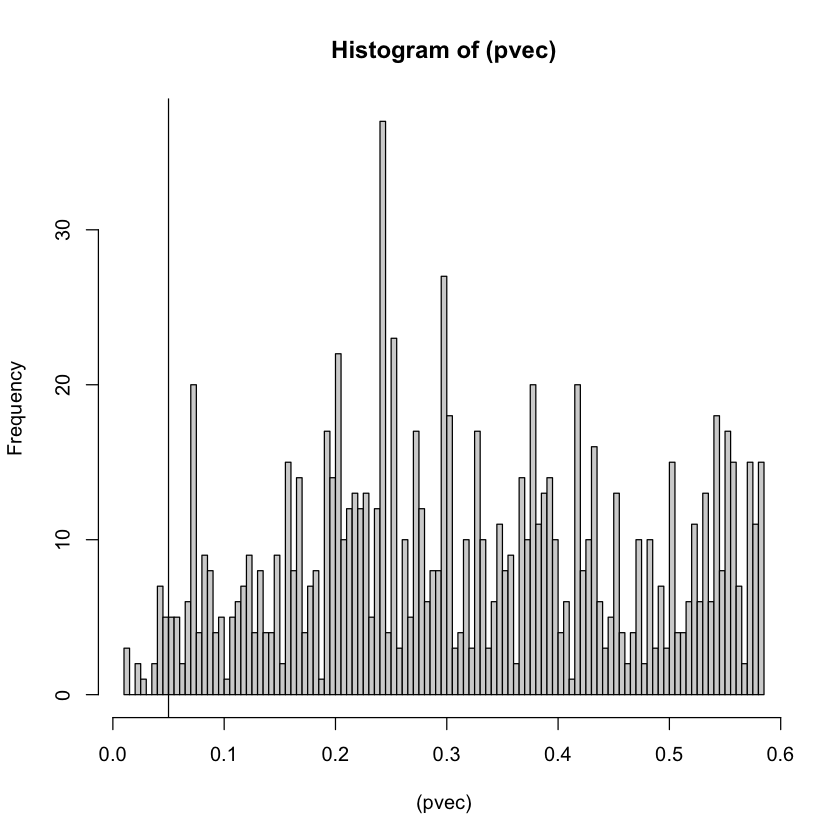

[1] 569

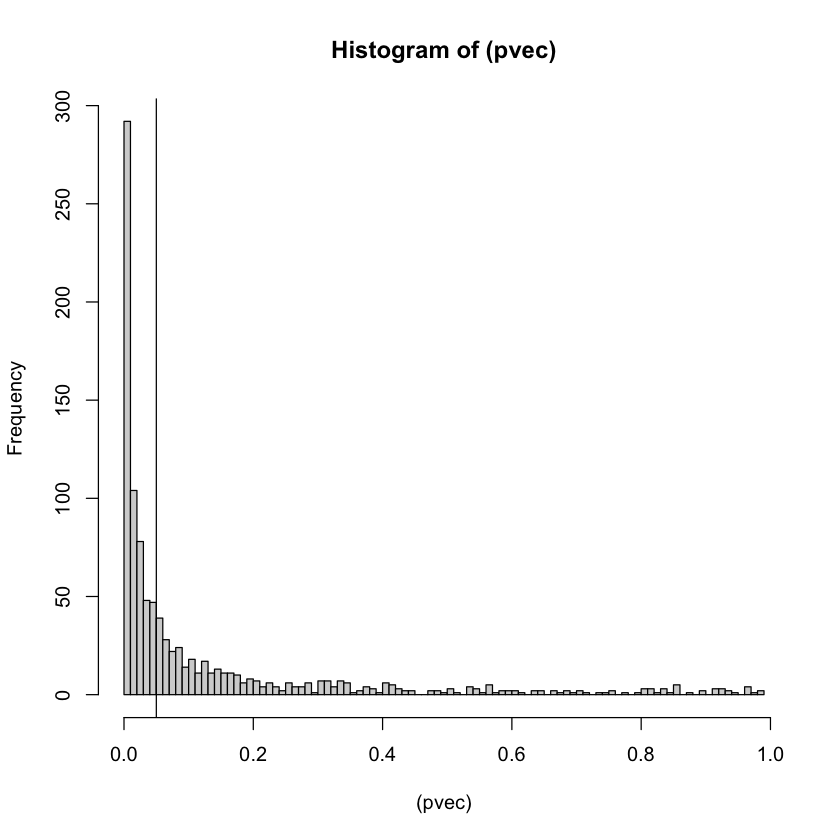

[1] 45

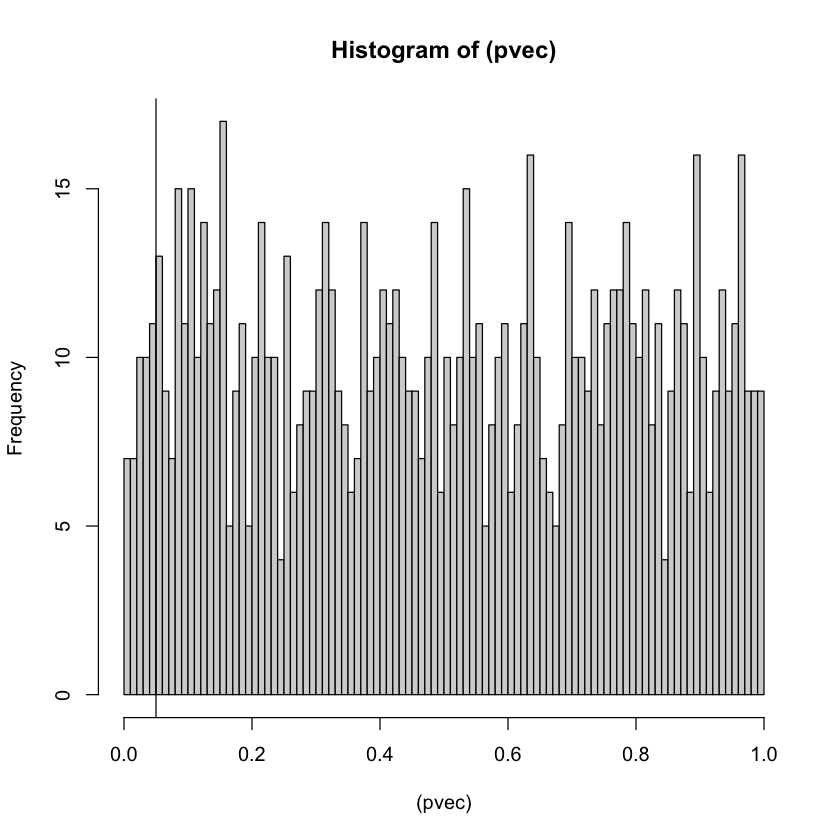

In [84]:
library(qvalue)
# a)
GetPval <- function(shift=0.5, num=10) {
  t.test(rnorm(num),rnorm(num,mean=shift))$p.value
}

GetPval(2, 10)


# b) 
pvec <- vector(,1000)
count = 0
for (i in 1:1000) {
  pvec[i] <- GetPval(shift=0.5)
    if (pvec[i] < 0.05)
        count=count+1
}
hist((pvec),100)
abline(v=0.05)
count

# c)
# helping out with this one: qvalue(yourvalues)$qvalues
# Bonferroni
pvec <- vector(,1000)
count = 0
for (i in 1:1000) {
  pvec[i] <- GetPval(shift=0.5)
    pvec[i] = p.adjust(pvec[i], method = "bonferroni")
    if (pvec[i] < 0.05)
        count=count+1
}
hist((pvec),100)
abline(v=0.05)
count

# Benjamin-Hochberg 
pvec <- vector(,1000)
count = 0
for (i in 1:1000) {
  pvec[i] <- GetPval(shift=0.5)
    pvec[i] = p.adjust(pvec[i], method = "BH")
    if (pvec[i] < 0.05)
        count=count+1
}
hist((pvec),100)
abline(v=0.05)
count

# qvalue()
pvec <- vector(,1000)
count = 0
for (i in 1:1000) {
  pvec[i] <- GetPval(shift=0.5)
}
pvec<- qvalue(pvec)$qvalues
hist((pvec),100)
abline(v=0.05)
paste("below 0.05:",sum(pvec < 0.05))

# d) 
pvec <- vector(,1000)
count = 0
for (i in 1:1000) {
  pvec[i] <- GetPval(shift=1)
    if (pvec[i] < 0.05)
        count=count+1
}
hist((pvec),100)
abline(v=0.05)
count

pvec <- vector(,1000)
count = 0
for (i in 1:1000) {
  pvec[i] <- GetPval(shift=0)
    if (pvec[i] < 0.05)
        count=count+1
}
hist((pvec),100)
abline(v=0.05)
count

##### Question I:  <u>What are the arguments ```shift``` and ```num``` in the function ```GetPval```? What happens when you call the function without arguments (```GetPval()```)</u>

_"Shift" refers to the mean difference between the two groups. "Num" is responsible for the sample size of the two group. It follows the default setting : shift = 0.5 , num = 10._

##### Question II:  <u>What is the expected percentage of p-values below 0.05 for ```shift=0```?</u>

_It is supposed to be 0._

##### Question III:  <u>Why is the number of corrected p-values below 0.05 smaller after correction? Order the corrections according to their number of p-values smaller than 0.05.</u>

_Order the corrections according to their number of p-values smaller than 0.05.
Because more restrictions are added to improve the reliability of multiple hypothesis testing, for example Bonferroni directly calculate p/n (0.05/1000) as adjusted new pvalue threshold.  
qvalue( ) < BH < Bonferroni_

